In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Calgary Air B&B Data 2017

In [2]:
# Filter all warnings.
# spurious warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

# Import Python libraries

import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import random

import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.5)
plt.rcParams['font.size']=15

In [4]:
originalcalgary = pd.DataFrame.from_csv('tomslee_airbnb_calgary_1558_2017-08-10.csv')

In [5]:
calgary = originalcalgary.drop(["bathrooms","minstay","survey_id","location","last_modified","country","city"], axis=1)

## Are there more hosts than rooms?


In [6]:
%%HTML
<div class='tableauPlaceholder' id='viz1550079345182' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CalgaryData_0&#47;hosttoroomcount&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CalgaryData_0&#47;hosttoroomcount' /><param name='tabs' value='no' /><param name='toolbar' value='no' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CalgaryData_0&#47;hosttoroomcount&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1550079345182');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='800px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>



# Are there hosts' homes in different neighborhoods?



In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1550079037087' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CalgaryData_0&#47;Map&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CalgaryData_0&#47;Map' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CalgaryData_0&#47;Map&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1550079037087');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# What if hosts are renting out single rooms?


In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1550079259705' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CalgaryData_0&#47;HostRoomType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CalgaryData_0&#47;HostRoomType' /><param name='tabs' value='no' /><param name='toolbar' value='no' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CalgaryData_0&#47;HostRoomType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1550079259705');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='800px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# What variables are useful to cluster the data?


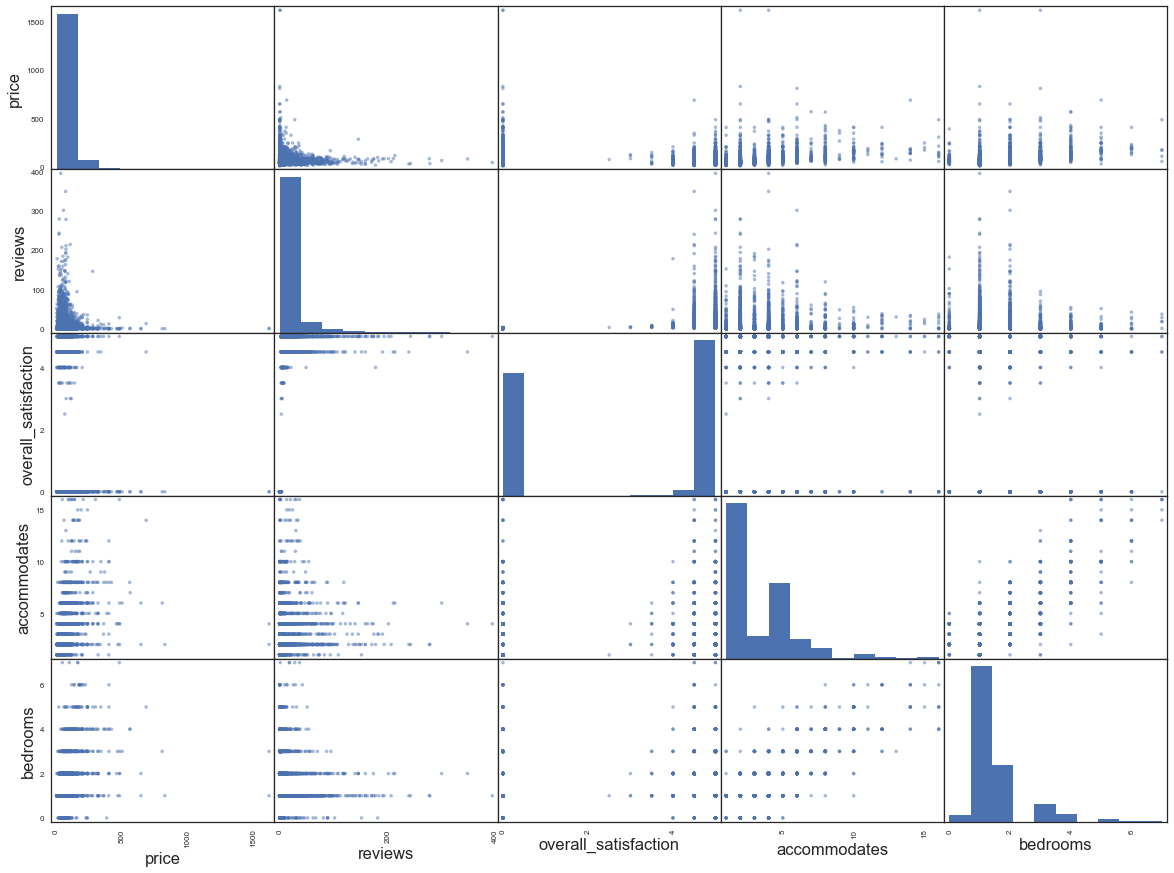

In [9]:
#number_col = ["survey_id", "host_id", "reviews", "overall_satisfaction", "accommodates","bedrooms","price"]

number_col = ["price","reviews", "overall_satisfaction", "accommodates","bedrooms"]
number_calgary = calgary[number_col].copy()

_ = pd.plotting.scatter_matrix(number_calgary, figsize=(20,15))

In [10]:
# Function to create a list of unique pairing of the input variables

def all_pairs(source):
    result = []
    for p1 in range(len(source)):
        for p2 in range(p1+1, len(source)):
            result.append([source[p1],source[p2]])
    return result

I tested using Euclidean and Chebyshev distance measure to calculate the distance matrix for the following pairs as well as testing with single, average and complete linkage. The least expensive on computational power was Euclidean distance measure and average linkage. The dendogram and clustering was found to be similar with both Euclidean and Chebyshev distance measures.

In [11]:
# Produce a list of unique pairing of the numerical variables

pairs = all_pairs(number_col)
pairs

[['price', 'reviews'],
 ['price', 'overall_satisfaction'],
 ['price', 'accommodates'],
 ['price', 'bedrooms'],
 ['reviews', 'overall_satisfaction'],
 ['reviews', 'accommodates'],
 ['reviews', 'bedrooms'],
 ['overall_satisfaction', 'accommodates'],
 ['overall_satisfaction', 'bedrooms'],
 ['accommodates', 'bedrooms']]

In [12]:
# Function to apply hierchical clustering, produce dendograms and clustered scatter plots

def hierchical_clustering_method(pair_var):
    df_xy = calgary[pair_var]

    # Computing distance measures
    dist_xy = spd.squareform(spd.pdist(df_xy, metric = 'euclidean'))
    # metric = euclidean/chebyshev
    
    # Perform hierarchical clustering and plot the dendrogram.
    # Computing linkage distance 
    Z_xy = sph.linkage(dist_xy, method='average') 
    
    # Plotting dendogram
    plt.subplots(figsize=(12,8))
    _ = sph.dendrogram(Z_xy)

    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.suptitle('Dendrogram: ' + str(pair_var), 
                 fontweight='bold', fontsize=20)
    plt.show()    
    
    return dist_xy, Z_xy

def hierchical_cut(dist,pair_var, Z_xy):
    # Cluster labels
    cluster_labels = sph.fcluster(Z_xy, dist, criterion='distance')
    # criterion = maxclust
    
    calgary['cluster_label'] = cluster_labels

    # Cluster image
    sns.lmplot(x=pair_var[0],y=pair_var[1], hue='cluster_label',
           fit_reg=False, data=calgary, size=5, aspect=1.3)
    ax = plt.gca()
    ax.set_title("Clustered scatter plot for " + str(pair_var))

    plt.show()

D:\cekwo\Anaconda\lib\site-packages\ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


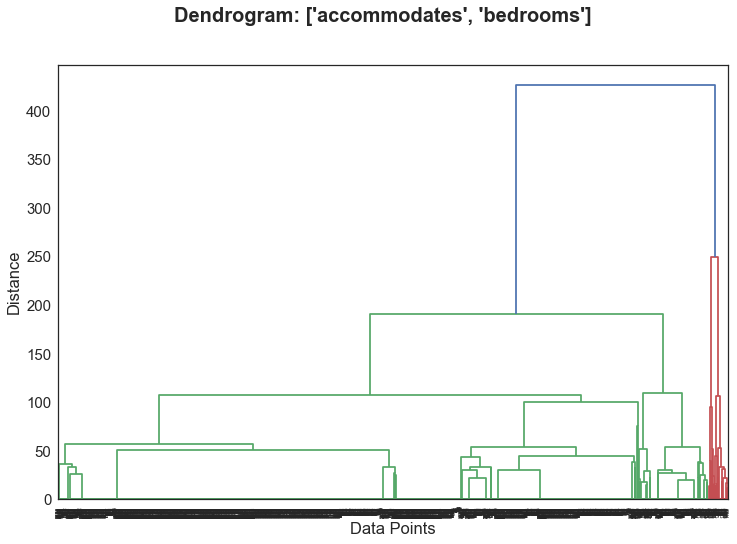

In [13]:
# Variables Accommodates and bedrooms

pair_var = pairs[9]
dist_xy, Z_xy = hierchical_clustering_method(pair_var)


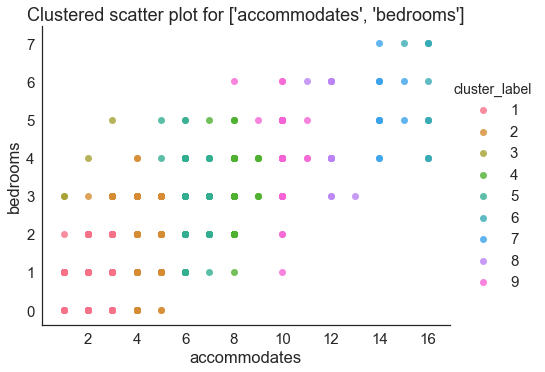

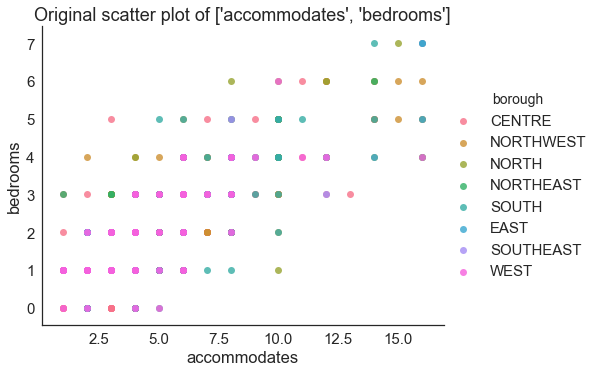

In [14]:
# Trimming hierchical tree to determine number of clusters

cut_dist = 80

hierchical_cut(cut_dist, pair_var, Z_xy)

sns.lmplot(x=pair_var[0], y=pair_var[1], hue='borough',
          fit_reg=False, data=calgary, size=5, aspect=1.3)

ax = plt.gca()
ax.set_title('Original scatter plot of ' + str(pair_var))

plt.show()

# K-means


In [15]:
def elbow_method(pair_var):
    df_xy = calgary[pair_var]
    K = range(1,41)  # Apply kmeans 1 to 40
    kmeans_models = [skc.KMeans(k).fit(df_xy) for k in K]
    centroids = [m.cluster_centers_ for m in kmeans_models]
    D_k = [spd.cdist(df_xy, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D, axis=1) for D in D_k]
    dist = [np.min(D, axis=1) for D in D_k]
    avgWithinSS = [sum(d)/df_xy.shape[0] for d in dist]

    # plot elbow curve
    plt.plot(K, avgWithinSS, 'b*-')
    plt.xlabel('Number of clusters');
    plt.ylabel('Average within-cluster sum of squares');
    plt.title('Elbow method for K-Means clustering');
    
    fname = 'elbow ' + str(pair_var)
    plt.savefig(fname)
    plt.show()

def kmeans_clustered(n_clusters, pair_var):
    df_xy = calgary[pair_var]
    kmeans_model = skc.KMeans(n_clusters= n_clusters)
    kmeans_model.fit(df_xy)
    centroids = kmeans_model.cluster_centers_
    
    df_xy['cluster_labels_kmeans'] = kmeans_model.labels_
    f = sns.lmplot(x=pair_var[0], y=pair_var[1], data=df_xy, hue='cluster_labels_kmeans',
                   fit_reg=False, size=5, aspect=1.3)
    f.ax.scatter(centroids[:,0], centroids[:,1], marker='+', s=100,
                 linewidths=2, color='k');
    plt.title('K-means centroids for ' + str(pair_var) + ' (k= ' + str(n_clusters) +')', fontsize=15)
    
    fname = 'kmeans_cluster ' + str(pair_var)
    plt.savefig(fname)
    plt.show()

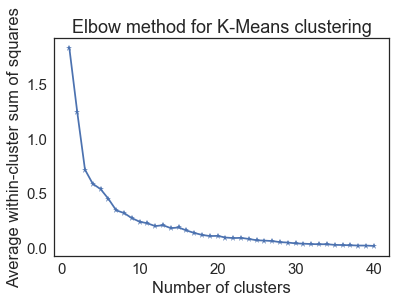

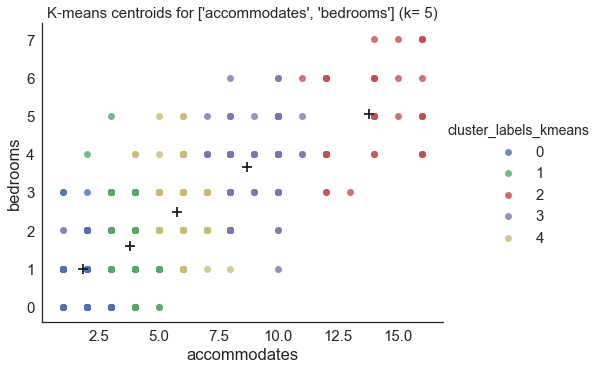

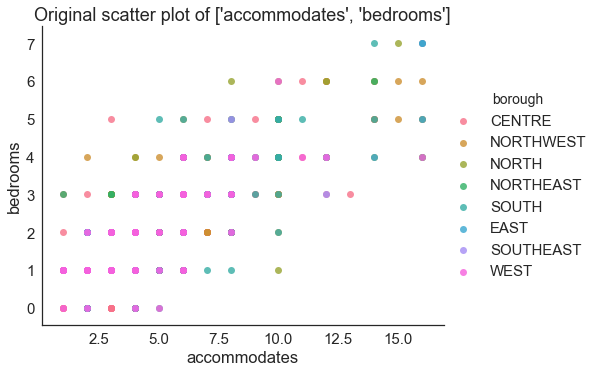

In [16]:
n_clusters = 5
pair_var = pairs[9]

elbow_method(pair_var)
kmeans_clustered(n_clusters, pair_var)


sns.lmplot(x=pair_var[0], y=pair_var[1], hue='borough',
          fit_reg=False, data=calgary, size=5, aspect=1.3)
ax = plt.gca()
ax.set_title('Original scatter plot of ' + str(pair_var))
plt.show()

## How well can we predict boroughs with classification methods?

I used both K-Nearest Neighbors and Naive Bayes classification methods to predict the borough given certain data.

## K-Nearest Neighbors

In [17]:
knn_df = calgary[['price', 'overall_satisfaction']]

In [18]:
# Import library - from sklearn.model_selection import train_test_split

random.seed(5)
f_train, f_test, l_train, l_test = train_test_split(knn_df,calgary['borough'], test_size=0.4, random_state=random.randint(0,1000))


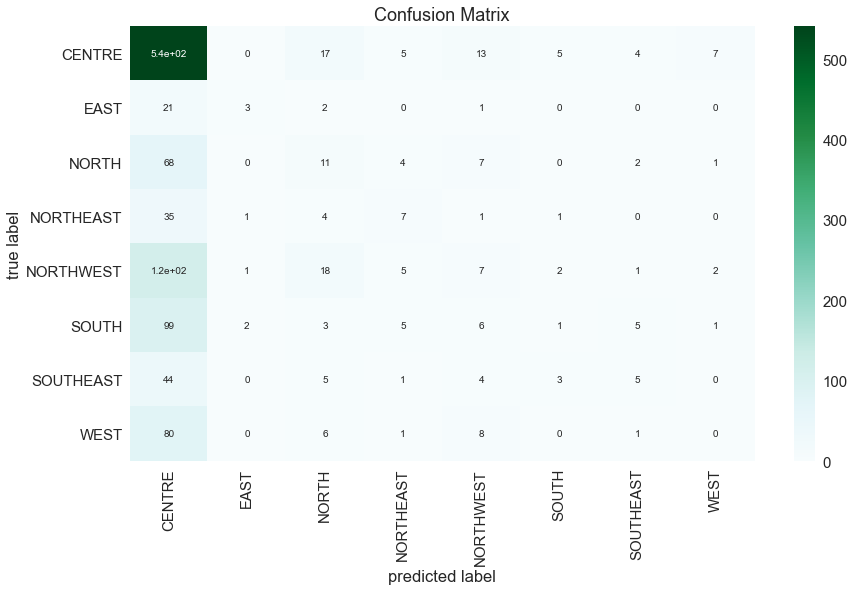

In [19]:
# Import library - from sklearn.neighbors import KNeighborsClassifier

n=8
calgary_knn = KNeighborsClassifier(n_neighbors=n)
calgary_knn.fit(f_train, l_train) 
calgary_pred = calgary_knn.predict(knn_df)

calgary_knn_pred = calgary_knn.predict(f_test)

calgary_knn_cfmat = skm.confusion_matrix(
    y_true=l_test,
    y_pred=calgary_knn_pred,)

plt.subplots(figsize = (14,8))
sns.heatmap(calgary_knn_cfmat, 
            xticklabels=calgary_knn.classes_,
            yticklabels=calgary_knn.classes_,
            annot=True, cmap = 'BuGn')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')
#plt.savefig('Confusion Matrix')
plt.show()

In [20]:
# Accuracy
print("Accuracy: ",skm.accuracy_score(y_true=l_test,
                   y_pred=calgary_knn_pred))

# Precision
print("Precision: ",skm.precision_score(y_true = l_test,
                    y_pred = calgary_knn_pred,
                    average = 'weighted'))

# F1 Score
print("F1 Score: ",skm.f1_score(y_true=l_test,
             y_pred=calgary_knn_pred,
             average='weighted'))

# Recall
print("Recall: ",skm.recall_score(y_true=l_test,
                 y_pred=calgary_knn_pred,
                 average='weighted'))

Accuracy:  0.4815745393634841
Precision:  0.3418560791189655
F1 Score:  0.3751379099090147
Recall:  0.4815745393634841


# Naive Bayes



In [21]:
# Import - from sklearn.naive_bayes import GaussianNB

random.seed(15)
f_train, f_test, l_train, l_test = train_test_split(calgary[number_col],calgary['borough'], test_size=0.4, random_state=random.randint(0,1000))

calgary_gnb = GaussianNB().fit(calgary[number_col], calgary['borough'])
calgary_gnb_predictions = calgary_gnb.predict(calgary[number_col])

calgary_test = GaussianNB().fit(f_train,l_train)
calgary_gnb_pred_test = calgary_gnb.predict(f_test)

In [22]:
# Accuracy
print("Accuracy: ",skm.accuracy_score(y_true=l_test,
                   y_pred=calgary_gnb_pred_test))

# Precision
print("Precision: ",skm.precision_score(y_true = l_test,
                    y_pred = calgary_gnb_pred_test,
                    average = 'weighted'))
# F1 Score
print("F1 Score: ",skm.f1_score(y_true=l_test,
             y_pred=calgary_gnb_pred_test,
             average='weighted'))

# Recall
print("Recall: ",skm.recall_score(y_true=l_test,
                 y_pred=calgary_gnb_pred_test,
                 average='weighted'))

Accuracy:  0.4715242881072027
Precision:  0.3131565529986226
F1 Score:  0.357423523601925
Recall:  0.4715242881072027


D:\cekwo\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\cekwo\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Thank you for your attention